Importing modules

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading the CSV file

In [13]:
data=pd.read_csv("Advertising.csv")

Seperating the columns to create features

In [14]:
X1 = data.loc[:,"TV"].values
X1_X1= X1**2

X2 = data.loc[:,"Radio"].values
X2_X2= X2**2

Y = data.loc[:,"Sales"].values

Normalizing the datasets

In [15]:

X1_N = (X1 - X1.mean())/X1.std()
X2_N = (X2 - X2.mean())/X2.std()
X1_X1_N = (X1_X1 - X1_X1.mean())/X1_X1.std()
X2_X2_N = (X2_X2 - X2_X2.mean())/X2_X2.std()
Y_N = (Y - Y.mean())/Y.std()

result = np.column_stack((X1_N, X1_X1_N, X2_N, X2_X2_N)).T
print(result.shape)

(4, 200)


Running iterations to update weights based on the obtained losses

In [16]:
theta=[0.5,0.5,0.5,0.5,0.5]
eta=0.1
iterations = 1000
J_All = []

for i in range(iterations):
    J = 0
    Jt0 = 0
    Jt1 = 0
    Jt2 = 0
    Jt3 = 0
    Jt4 = 0
    for j in range(m):
        J = J + (1/m) * ((theta[0] + theta[1]*X1_N[j] + theta[2]*X1_X1_N[j] + theta[3]*X2_N[j] + theta[4]*X2_X2_N[j]) - Y_N[j])**2
        Jt0 = Jt0 + ((1/m) * 2 * ((theta[0] + theta[1]*X1_N[j] + theta[2]*X1_X1_N[j] + theta[3]*X2_N[j] + theta[4]*X2_X2_N[j]) - Y_N[j]))
        Jt1 = Jt1 + ((1/m) * 2 * ((theta[0] + theta[1]*X1_N[j] + theta[2]*X1_X1_N[j] + theta[3]*X2_N[j] + theta[4]*X2_X2_N[j]) - Y_N[j]) * X1_N[j])
        Jt2 = Jt2 + ((1/m) * 2 * ((theta[0] + theta[1]*X1_N[j] + theta[2]*X1_X1_N[j] + theta[3]*X2_N[j] + theta[4]*X2_X2_N[j]) - Y_N[j]) * X1_X1_N[j])
        Jt3 = Jt3 + ((1/m) * 2 * ((theta[0] + theta[1]*X1_N[j] + theta[2]*X1_X1_N[j] + theta[3]*X2_N[j] + theta[4]*X2_X2_N[j]) - Y_N[j]) * X2_N[j])
        Jt4 = Jt4 + ((1/m) * 2 * ((theta[0] + theta[1]*X1_N[j] + theta[2]*X1_X1_N[j] + theta[3]*X2_N[j] + theta[4]*X2_X2_N[j]) - Y_N[j]) * X2_X2_N[j])
    J_All.append(J)
    theta[0] -= (Jt0)*eta
    theta[1] -= (Jt1)*eta
    theta[2] -= (Jt2)*eta
    theta[3] -= (Jt3)*eta
    theta[4] -= (Jt4)*eta

In [17]:
print (eta)
print (len(theta)==5)
print (len(J_All)>100)


0.1
True
True


Plotting the loss for each iteration

0.08263881983507586


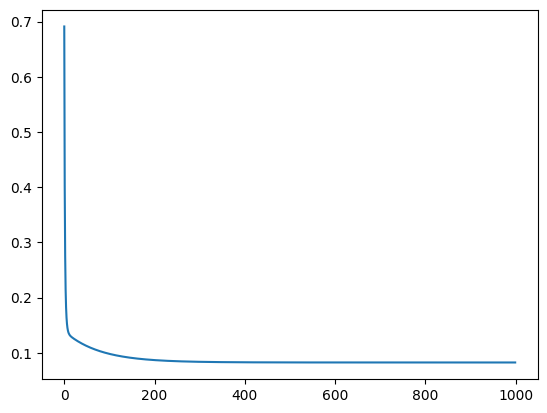

In [18]:
plt.plot(J_All)
print(J_All[-1])

Forming my predictions

In [19]:
Predicted=[]
for i in range(m):
  P=theta[0]+theta[1]*X1_N[i]+theta[2]*X1_X1_N[i]+theta[3]*X2_N[i]+theta[4]*X2_X2_N[i]
  Predicted.append(P)

Predicted = pd.Series(Predicted)

Text(0, 0.5, 'Sales')

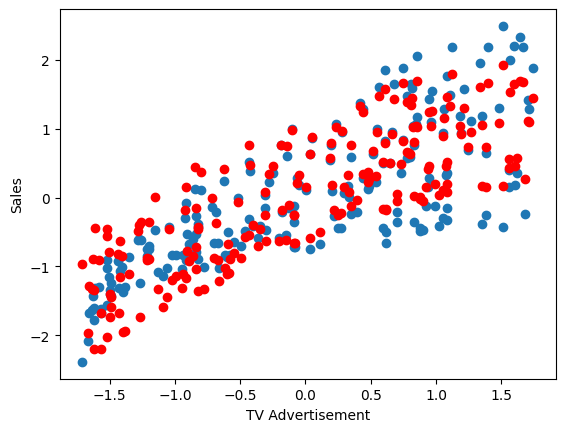

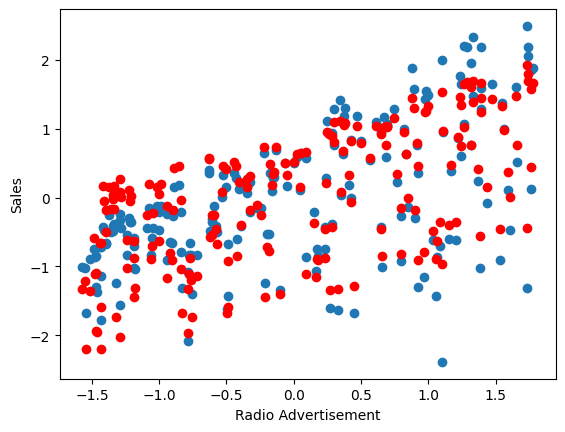

In [20]:
plt.scatter(X1_N,Y_N)
plt.scatter(X1_N,Predicted,color='red')
plt.xlabel('TV Advertisement')
plt.ylabel('Sales')
plt.figure()
plt.scatter(X2_N,Y_N)
plt.scatter(X2_N,Predicted,color='red')
plt.xlabel('Radio Advertisement')
plt.ylabel('Sales')